# M0X_E0X_Medios_Python_Networks

### PENSAMIENTO COMPUTACIONAL 2024-B

## - - - - SIN NOTA - SOLO PRÁCTICA - - - -  

* Prof. Ricardo Vega M. - Escuela de Diseño Universidad Católica de Chile - 2024.  

* Renombrar archivo así: E0X_apellido_nombre_rut, por ejemplo:
E0X_vega_ricardo_102349285  

* Renombrar el título así: M0X_E0X_Nombre_Ejercicio_apellido_nombre_rut, por ejemplo:
M0X_E0X_TIT_vega_ricardo_102349285

* X equivale al número de la tarea.

En la tarea de esta semana, veremos estas cosas:

* 0- Redes: ¿Qué son? Estructura de datos.    
* A- Redes: Importar Datos Los Miserables.  
* B- Redes: Crear nodos y enlaces. 
* C- Redes: Exploración Visual Inicial.  
* D- Redes: Diferentes Layouts. 
* E- Redes: Visualización Mejorada.  
* F- Redes: Métricas de Centralidad.   

Usaremos la red de la novela de Victor Hugo "Los miserables".   


## 0- ¿Qué son las redes? (0 punto): 

No se trata ni de redes sociales como facebook, ni de redes de pesca, ni redes de computadores. Es una ciencia que aparece el siglo 20 que describe y analiza colecciones de nodos y vínculos. 

Los elementos que componen las redes son Nodos y Vínculos:
    
**NODOS:** Son los elementos que se conepctan pueden ser personas, cosas, palabras, etc. Pueden tener atributos como color de pelo, tamaño, u otros. 

**Vínculos:** Son las conexiones o tipos de relación entre los nodos, pueden ser por parentezco, amistad, etc. Estas relaciones pueden estar dirigidas o no. Por ejemplo no dirigido es si Juan y Pedro son compañeros de clase. Dirigido es si Juan prestó dinero a Pedro, esa relación tiene dirección. 

**TIPOS DE GRAFOS:**  
 
Existen redes en las cuales existe una dirección de la conexión o interacción, por lo que pueden ser dirigidas o no dirigidas.    
**No Dirigidas, o Simétrica:** Relación no implica dirección o jerarquía, como una relación de amistad, o si son compañeros de curso. 
**Dirigidas, o Asimétrica:** Implica dirección de la relación, la cual puede estar dada por jerarquía o dirección de la acción. Por ejemplo a quien se presta dinero, a quien se pregunta, a qué ciudad pertenece alguien, a quien se suministra algo, etc.  

**Compnentes de un grafo** También un grafo puede estar completamente conectado por lo que tiene un solo componente. O tener algunas letras desconectadas, por lo cual está compuesto por dos o más componentes desconectados entre ellos.   
    

**METRICAS:**
 
Para comprender las redes hay diferentes métricas. La de **centralidad** de los nodos, que permite ver cuales son los nodos centrales de la red. Hay 3 tipos de centralidad: 

**Centralidad de grado (degree centrality):** Es el nodo que tiene más conexiones a otros nodos.  
**Centralidad de cercanía (closeness centrality):** Indica que tan cercano está un nodo de otros nodos.  
**Centralidad de intermediación (betweenness centrality):** Indica qué tantas conexiones se permite en el grafo. 

Otras medidas son:  

**Grado:** indica número de relaciones o con cuántos otros nodos se conecta. Permite ver que tan importante es un nodo. Por ejemplo, con cuántas personas se conecta un individuo.  
**Distancia:** Número de pasos de separación entre nodos. Entre dos nodos, cuántos nodos intermedios hay.   
**Distancia o ruta geodésica:** Señala la distancia usando el camino más corto entre nodos. Son el número de enlaces en la ruta más corta que los conecta.   
**Diámetro Máximo:** Es la distancia máxima entre cualquier par de nodos en el grafo.  
    
    

In [57]:
# Importa aquí las librerías que vayas a utilizar

#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx


## A- Redes: Importar Datos Los Miserables. (0 puntos):  
Archivos de redes hay varios como GML, GEFX, incluso pueden ser json, xml, o tabular. 
En el caso de los datos tabulares, estos deben convertirse a estructura de grafos indentificando los nodos y las relaciones. 

Partiremos leyendo un archivo de grafos muy famoso, de "Los Miserables" de Victor Hugo. Esta contiene los personajes que aparecen en la novela y las relaciones que tienen entre ellos.  


In [58]:
# A1- Cargar datos. 

## - - - - - - - - - - - -
## DESDE COMPU LOCAL USAR ESTE CÓDIGO PARA TRAER ARCHIVOS
## - - - - - - - - - - - -
ruta_archivo = "e13_datos_redes/losmiserables.gexf" # comentar desde Colab
ruta_archivo  # comentar desde Colab


'e13_datos_redes/losmiserables.gexf'

In [59]:
## - - - - - - - - - - - -
## DESDE COLAB USAR ESTE CÓDIGO PARA TRAER ARCHIVOS
## - - - - - - - - - - - -

# subir 'losmiserables.gexf'
#uploaded = files.upload()


In [60]:
## - - - - - - - - - - - -
## DESDE COLAB USAR ESTE CÓDIGO PARA TRAER ARCHIVOS
## - - - - - - - - - - - -

# Una vez cargado, mostrar
#ruta_archivo = '/content/losmiserables.gexf'
 

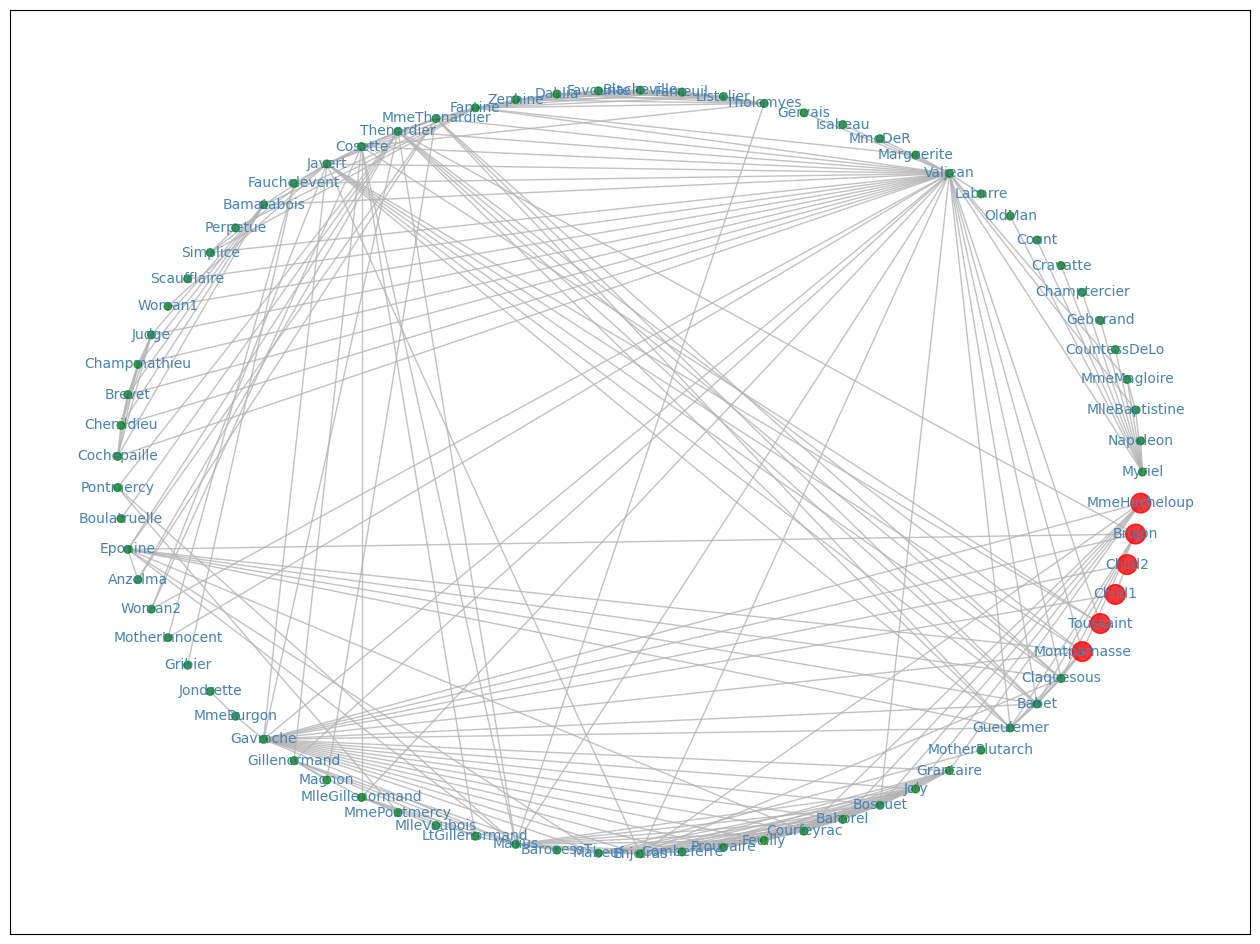

In [61]:
# Al grafo de Los Miserables le llamaremos GM
GM = nx.read_gexf( ruta_archivo ) # creamos el grafo con los datos del archivo 

# Leemos los atributos de los nodos
GM_datos  = nx.get_node_attributes(GM, "label")

# El grafo no tienen en si mismo una forma, por eso se le da un layout. 
semilla = 31 # para que posiciones no sean aleatorias  
posGM = nx.circular_layout( GM ) # escogemos este layout por ahora 

# Pintar con un color diferente según un umbral de valor
deg_cent_GM = nx.degree_centrality(GM) # obtenemos centralidad de grado de cada nodo

color_map = [] # para guardar valores de color
size_map  = [] # para guardar valores de tamaño

for i in deg_cent_GM.keys():
    if float(i) > 70:
        color_map.append('red')
        size_map.append( 200 )  
    else: 
        color_map.append('green')  
        size_map.append( 30 ) 

# Dibujaremos el grafo de los miserables
fig, axs = plt.subplots( figsize=(16, 12) )

# Las etiquetas 
nx.draw_networkx_labels(GM, posGM, labels=GM_datos, font_size=10, font_color="steelblue")
# La red
nx.draw_networkx(GM, with_labels=False, node_color=color_map, 
                 node_size=size_map, alpha=.8, width=1, edge_color=".7", ax=axs, pos=posGM, 
                )


In [62]:
# Puedes probar mostrando algunos valores del grafo. Descomentar de uno en uno  

GM_nodos = nx.nodes(GM) 
GM_edges = nx.edges(GM) 

# Mostrar
print( GM ) # indica la cantidad de nodos y enlaces del grafo 
#GM_nodos # muestra los nodos del grafo
#GM_edges # muestra los enlaces del grafo


Graph with 77 nodes and 254 edges


In [63]:
# Leer atributos de los nodos. Ojo que es un dict(), 
# O sea un diccinario en Python que tiene clave-valor (key-value), ej: '1.0': 'Napoleon' 
GM_datos  = nx.get_node_attributes(GM, "label")

# Guardarlos en una variable 
GM_keys   = GM_datos.keys() # cada clave
GM_values = GM_datos.values() # cada valor

# Mostrar
#print( GM_datos )
#print( list[ GM_keys ] )  # los índices donde se guardan los atributos etiqueta
print( list[ GM_values ] ) # los nombres del atributo etiqueta


list[dict_values(['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup'])

## B- Redes: Crear nodos y enlaces (0 puntos):  

Además de archivos de grafos, se pueden crear grafos, para lo cual se crean las entidades y las relaciones. Hay muchas maneras, pero veremos una de las más simples. 

A continuación un ejemplo de como crear una red de amigos. De cada persona se pone con quien tiene una amistad (de a pares), y se guardan en una variable cada par. Luego se convierte en Dataframe de Pandas. Finalmente se convierte el dataframe en una red de NetworkX.  


In [64]:
# B1- Redes: Estructura de datos.  

# Creación de relaciones: cada persona se pone con quien tiene una amistad (de a pares)
# Se guardan en una variable cada par. 
p01 = [ "Alicia","Beatriz" ]
p02 = [ "Alicia","Carlos" ]
p03 = [ "Alicia","Diego" ]
p04 = [ "Alicia","Enrique" ]
p05 = [ "Alicia","Ignacia" ]
p06 = [ "Alicia","Sergio" ]
p07 = [ "Beatriz","Sergio" ]
p08 = [ "Beatriz","Tania" ]
p09 = [ "Beatriz","Ursula" ]
p10 = [ "Carlos","Ignacia" ]
p11 = [ "Carlos","Victor" ]
p12 = [ "Diego","Karen" ]
p13 = [ "Diego","Leo" ]
p14 = [ "Diego","Jose" ]
p15 = [ "Diego","Enrique" ]
p16 = [ "Diego","Felipe" ]
p17 = [ "Enrique","Beatriz" ]
p18 = [ "Enrique","Ximena" ]


# Nombres de variables en listas para hacerlo más facil. 
personas = [ p01, p02, p03, p04, p05, p06, p07, p08, p09, p10,
             p11, p12, p13, p14, p15, p16, p17, p18  ]
personas_cols = [ "p01", "p02", "p03", "p04", "p05", "p06", "p07", "p08", "p09", "p10", 
                  "p11", "p12", "p13", "p14", "p15", "p16", "p17", "p18" ]

# Se convierten las relaciones de las listas en Dataframe de Pandas
# Más adelante se convierte el DataFrame en una red de NetworkX.  
dfred = pd.DataFrame( personas )
dfred.index = personas_cols

# Mostrar el DataFrame  
dfred


,0,1
p01,Alicia,Beatriz
p02,Alicia,Carlos
p03,Alicia,Diego
p04,Alicia,Enrique
p05,Alicia,Ignacia
p06,Alicia,Sergio
p07,Beatriz,Sergio
p08,Beatriz,Tania
p09,Beatriz,Ursula
p10,Carlos,Ignacia


In [65]:
# Finalmente se convierte el DataFrame en una red de NetworkC.  

# Al grafo de los amigos le llamaremos GA
GA = nx.from_pandas_edgelist( dfred, 0, 1 )


## C- Redes: Exploración Visual Inicial (0 puntoa) 

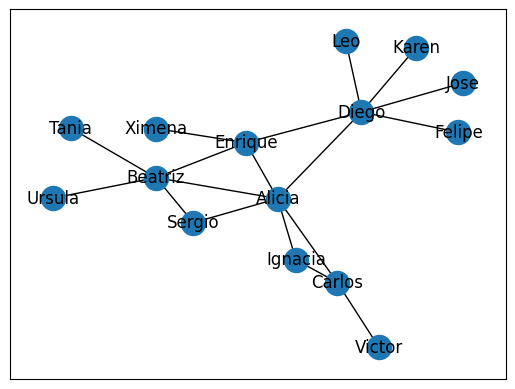

In [66]:
# El Grafo creado GA lo mostraremos con un gráfico muy simple

# Fijarse que cada vez que corre la celda, se muestra de manera aleatoria
nx.draw_networkx( GA ) 


## D- Redes: Diferentes Layouts. 

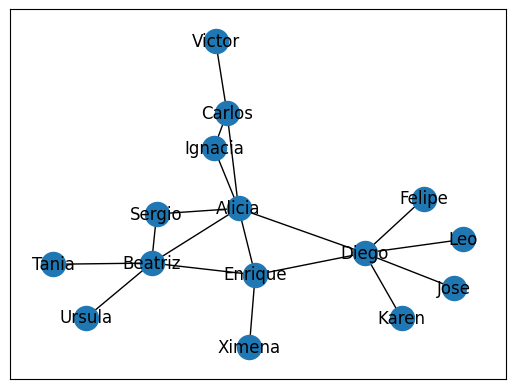

In [67]:
# Tipo de layout para representar el grafo, algunas llevan semilla otras no.  

semilla = 31 # para que posiciones no sean aleatorias, no funciona en todos los tips de layout  

# Varios tipos de layout, aca algunos. Se guardan en la variable posGA
# Comentar y Descomentar los que se quiera probar
posGA = nx.fruchterman_reingold_layout( GA, seed=semilla )  
#posGA = nx.spectral_layout( GA )  
#posGA = nx.circular_layout( GA )  
#posGA = nx.spring_layout( GA, seed=semilla ) 
#posGA = nx.shell_layout( GA ) 
#posGA = nx.kamada_kawai_layout( GA ) 

# Mostrar grafo 
nx.draw_networkx( GA, pos=posGA ) 


## E- Redes: Visualización Mejorada (0 punto):   


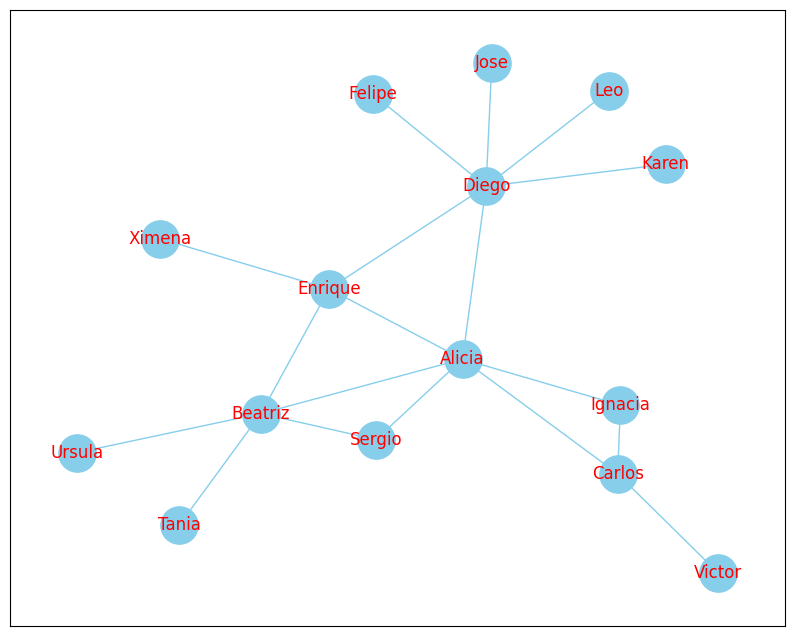

In [68]:
# Tipo de layout para representar el grafo, algunas llevan semilla otras no.  

posGA = nx.fruchterman_reingold_layout( GA, seed=semilla )  
#posGA = nx.spectral_layout( GA )  
#posGA = nx.circular_layout( GA )  
#posGA = nx.spring_layout( GA, seed=semilla ) 
#posGA = nx.shell_layout( GA ) 
#posGA = nx.kamada_kawai_layout( GA ) 

semilla = 15 # cambiar la semilla para ver que pasa
posGA = nx.fruchterman_reingold_layout( GA, seed=semilla )  

# Dibujar grafo 
plt.figure(figsize=(10,8))
nx.draw_networkx( GA, pos=posGA, with_labels=True, font_size=12, font_color="red", 
                 node_color="skyblue", node_size=720, 
                 edge_color="skyblue" ) 


## F- Redes: Métricas de centralidad (0 punto):   


In [69]:
# De Los Miserables 
# Grado o Degree 
deg_deg_GM = nx.degree(GM)

# Dentralidad de grado o Degree Centrality
deg_cent_GM = nx.degree_centrality(GM)

# Centralidad de Cercanía o Closeness Centrality
close_cent_GM = nx.closeness_centrality(GM)

# Centralidad de Intermediación o Betweenness Centrality
betw_cent_GM = nx.betweenness_centrality(GM)

# Mostrar - puede ir comentando o descomentando lo que le interese mostrar
print( deg_deg_GM ) 
print( "- "*10 ) # separador visual

print( deg_cent_GM ) 
print( "- "*10 ) 

print( close_cent_GM ) 
print( "- "*10 ) 

print( betw_cent_GM ) 


[('0.0', 10), ('1.0', 1), ('2.0', 3), ('3.0', 3), ('4.0', 1), ('5.0', 1), ('6.0', 1), ('7.0', 1), ('8.0', 1), ('9.0', 1), ('10.0', 1), ('11.0', 36), ('12.0', 2), ('13.0', 1), ('14.0', 1), ('15.0', 1), ('16.0', 9), ('17.0', 7), ('18.0', 7), ('19.0', 7), ('20.0', 7), ('21.0', 7), ('22.0', 7), ('23.0', 15), ('24.0', 11), ('25.0', 16), ('26.0', 11), ('27.0', 17), ('28.0', 4), ('29.0', 8), ('30.0', 2), ('31.0', 4), ('32.0', 1), ('33.0', 2), ('34.0', 6), ('35.0', 6), ('36.0', 6), ('37.0', 6), ('38.0', 6), ('39.0', 3), ('40.0', 1), ('41.0', 11), ('42.0', 3), ('43.0', 3), ('44.0', 2), ('45.0', 1), ('46.0', 1), ('47.0', 2), ('48.0', 22), ('49.0', 7), ('50.0', 2), ('51.0', 7), ('52.0', 2), ('53.0', 1), ('54.0', 4), ('55.0', 19), ('56.0', 2), ('57.0', 11), ('58.0', 15), ('59.0', 11), ('60.0', 9), ('61.0', 11), ('62.0', 13), ('63.0', 12), ('64.0', 13), ('65.0', 12), ('66.0', 10), ('67.0', 1), ('68.0', 10), ('69.0', 10), ('70.0', 10), ('71.0', 9), ('72.0', 3), ('73.0', 2), ('74.0', 2), ('75.0', 7),

## PREGUNTA:

¿Con qué método o métrica podría decir cuál es el nodo más conectado?

A simple Vista, ¿Cuáles podría decir usted que son los nodos más conectados?

¿Qué importancia tiene el hecho de que un nodo este más conectado con otros?


## Ejercicios sugeridos

Cree su propia red de amigos, y visualícela usando los procesos anteriores que estime. 
